# IMPORTING LIBRARIES

In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

# DATASET LOADING

In [2]:
data=pd.read_excel("dataset.xls")
df=data.copy()
df.head()

,id,gender,age,height,weight,blood,relative headache,alcohol,cigarette,computer usage,headache in last year,min 5 attacks,4-72 hours duration,unilateral,pulsative,moderate or severe,increase in movement,nausea and/or vomiting,photophobia or phonophobia,Doctor Decision,prediction(headache),Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,4.00,female,18.00,165.00,53,A Rh+,yes,no,no,4.00,yes,no,yes,yes,yes,no,yes,yes,yes,probable,probable migraine,1,0,0,NaN,NaN,doktor migren sayısı,doktor olası migren sayısı,doktor migren yok sayısı
1,5.00,female,18.00,171.00,60,0 Rh+,yes,yes,yes,3.00,yes,no,no,yes,yes,no,yes,no,yes,nothing,no migraine,0,1,0,NaN,NaN,42,113,198
2,6.00,male,19.00,NaN,73,0 Rh+,yes,no,no,1.00,yes,no,no,no,yes,no,yes,no,yes,probable,no migraine,0,0,0,NaN,NaN,NaN,NaN,NaN
3,7.00,male,18.00,170.00,65,AB Rh+,no,yes,no,6.00,no,no,no,no,no,yes,no,no,no,nothing,no migraine,0,1,0,NaN,NaN,NaN,NaN,NaN
4,8.00,male,18.00,183.00,76,0 Rh+,no,yes,yes,8.00,yes,no,yes,no,yes,no,no,no,no,migraine,probable migraine,0,0,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# drop unnecessary columns
df.drop(["Unnamed: 21",	"Unnamed: 22",	"Unnamed: 23",	"Unnamed: 24",
         "Unnamed: 25",	"Unnamed: 26",	"Unnamed: 27",	"Unnamed: 28","Doctor Decision","prediction(headache)"],axis=1,inplace=True)

<div class="alert alert-block alert-info">
<b>*</b> Burada gereksiz kolonları kaldırdık.
</div>

# EXPLORATORY DATA ANALYSIS

In [4]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          353 non-null    float64
 1   gender                      353 non-null    object 
 2   age                         352 non-null    float64
 3   height                      349 non-null    float64
 4   weight                      346 non-null    object 
 5   blood                       255 non-null    object 
 6   relative headache           353 non-null    object 
 7   alcohol                     353 non-null    object 
 8   cigarette                   353 non-null    object 
 9   computer usage              352 non-null    float64
 10  headache in last year       353 non-null    object 
 11  min 5 attacks               348 non-null    object 
 12  4-72 hours duration         347 non-null    object 
 13  unilateral                  353 non

<div class="alert alert-block alert-info">
<b>*</b> Veri seti 354 satıra ve 19 feature'a sahiptir. Ve bu 19 feature'in tamamında null değer yok. Ve bunların 4 float , 15'ü kategorik veya string feature'dır.
</div>

In [5]:
# check shape and unique values
def check_df(df):
    print("##################### Unique value counts #####################")
    print(df.nunique())
check_df(df)

##################### Unique value counts #####################
id                            353
gender                          3
age                            10
height                         40
weight                         57
blood                           7
relative headache               2
alcohol                         2
cigarette                       2
computer usage                 16
headache in last year           2
min 5 attacks                   2
4-72 hours duration             2
unilateral                      2
pulsative                       2
moderate or severe              2
increase in movement            2
nausea and/or vomiting          2
photophobia or phonophobia      2
dtype: int64


In [6]:
# summary statistics
df.drop("id",axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
age,352.00,19.58,1.71,18.00,19.00,19.00,20.00,38.00
height,349.00,173.13,9.00,145.00,165.00,173.00,180.00,198.00
computer usage,352.00,3.45,2.97,0.00,1.00,3.00,5.00,17.00


<div class="alert alert-block alert-info">
<b>*</b> Burada veri setindeki numeric kolonların istatistiksel analizini gösterdik:
Örnek olarak age kolonunun ortalaması 19.58, standart sapması 1.71, min değeri 18.00, medianı 19, max değeri 38'dir
</div>

# FEATURE ENGINEERING

In [7]:

# convert object to numeric:

df["weight"]= pd.to_numeric(df["weight"],errors="coerce")

# changing " male" values to "male" in gender column:

for i in df["gender"].index:
    if df["gender"][i]== " male":
        df["gender"][i]="male"

In [8]:
# check missing values

# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio %'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

,n_miss,ratio %
blood,99,27.97
weight,9,2.54
4-72 hours duration,7,1.98
min 5 attacks,6,1.69
height,5,1.41
computer usage,2,0.56
age,2,0.56
nausea and/or vomiting,1,0.28
increase in movement,1,0.28
moderate or severe,1,0.28


<div class="alert alert-block alert-info">
<b>*</b> Burada kolon başına eksik değer miktarini ve kolonlardaki eksik değerlerin, kolondaki toplam değere olan oranını gösterdik. Dikkate değer bir eksik değere sahip olan kolon, blood kolonudur ve % 27.97 eksik değere sahiptir.
</div>

<Axes: >

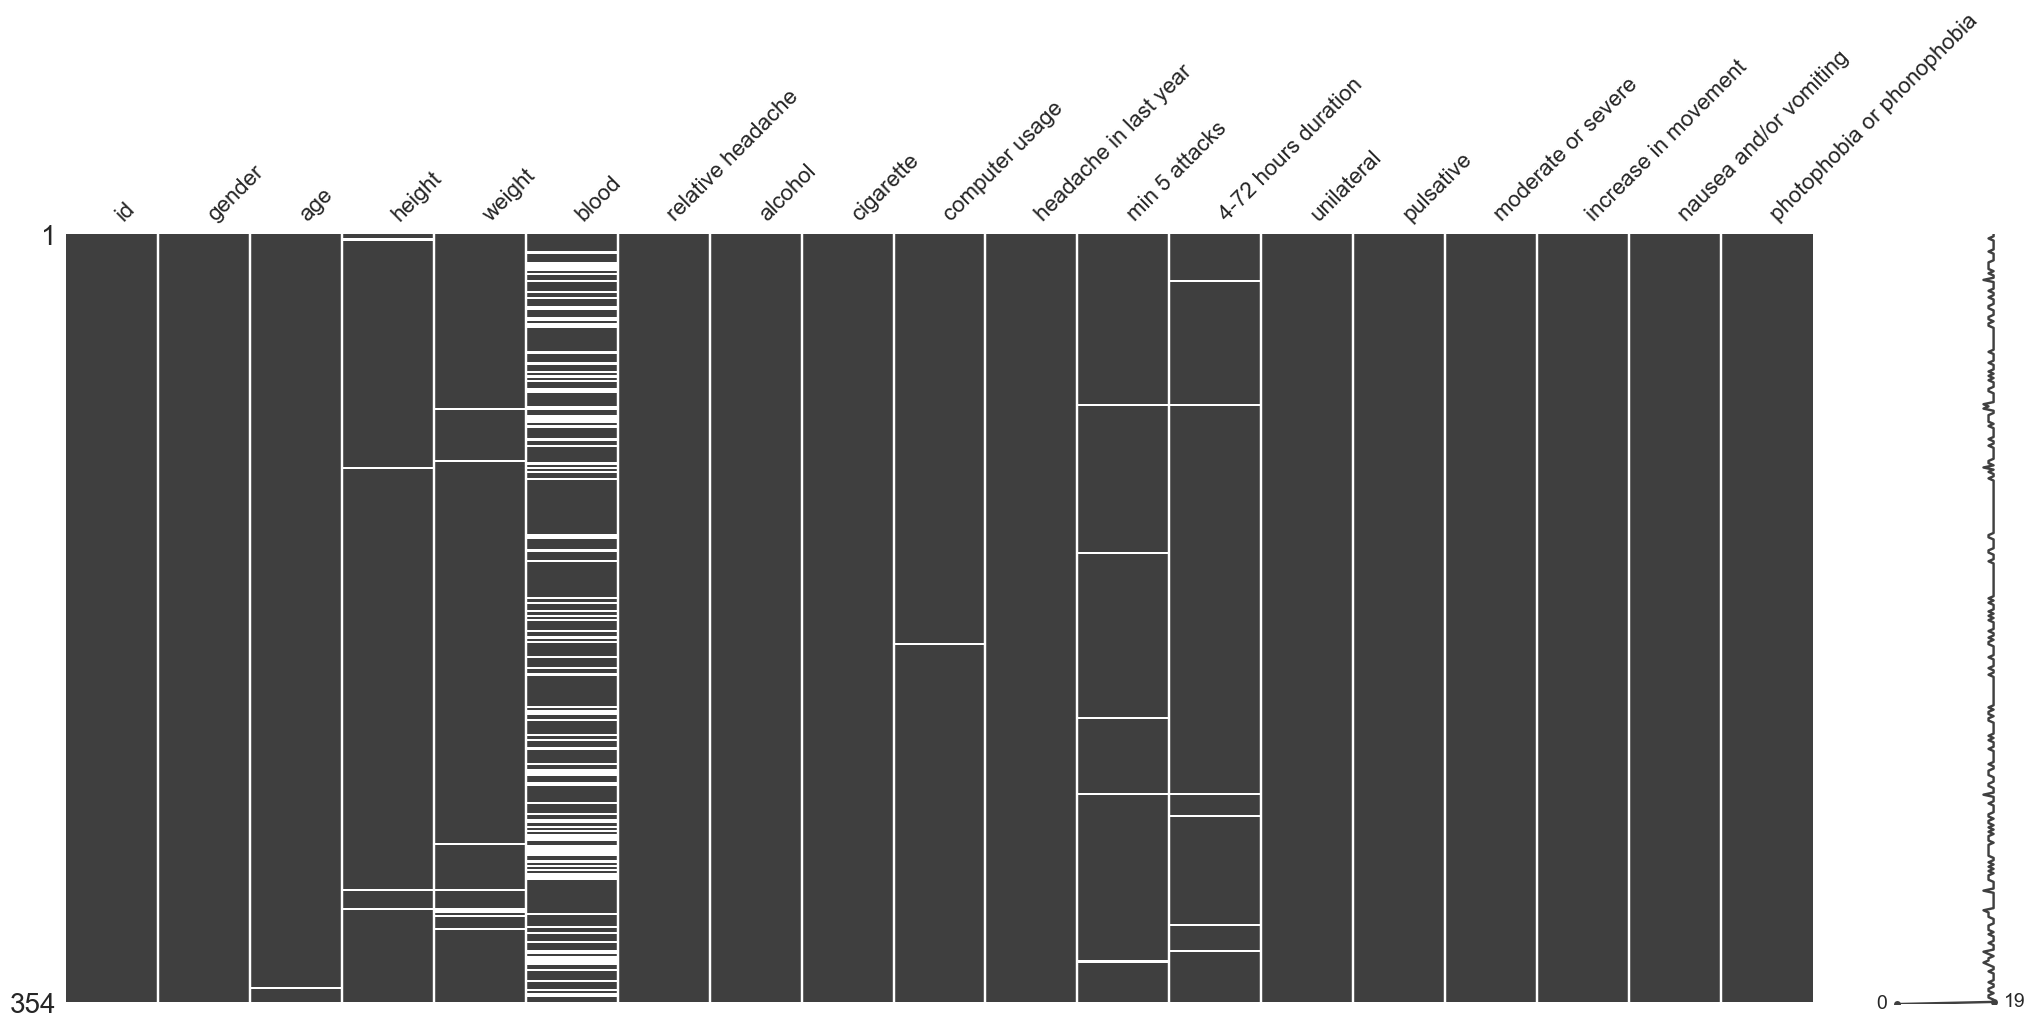

In [9]:
# veri setinde ki eksik değerlerin görselleştirilmesi
import missingno as msno
msno.matrix(df)

In [10]:
# fill categorical missing values with mode  

cat_cols=[col for col in df.columns if df[col].dtypes=="O"]
def fill_cat_missing_values(df):
    for col in df[cat_cols].columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

df=fill_cat_missing_values(df)
missing_values_tabl(df)

,n_miss,ratio %
weight,9,2.54
height,5,1.41
age,2,0.56
computer usage,2,0.56
id,1,0.28


<div class="alert alert-block alert-info">
<b>*</b> Burada kategorik kolonlardaki eksik değerleri kolonların modları ile doldurduk
</div>

In [11]:
# id kolonunda ki nan değeri bul ve sil

a=df[df["id"].isnull()].index
df.drop(a,axis=0,inplace=True)
missing_values_tabl(df)

,n_miss,ratio %
weight,8,2.27
height,4,1.13
age,1,0.28
computer usage,1,0.28


In [12]:
# fill numeric missing values with simple imputer

from sklearn.impute import SimpleImputer

def fill_num_missing_values(df):
    
    num_cols=[col for col in df.columns if df[col].dtypes!="O"]
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[num_cols] = imputer.fit_transform(df[num_cols])
    return df

df=fill_num_missing_values(df)

missing_values_tabl(df)

,n_miss,ratio %


<div class="alert alert-block alert-info">
<b>Example:</b> Burada veri setinde ki numeric kolonlardaki eksik değerleri kolonların ortalamaları ile doldurdum. Sonuç olarak veri setinde missing value kalmamış oldu.
</div>

<Axes: >

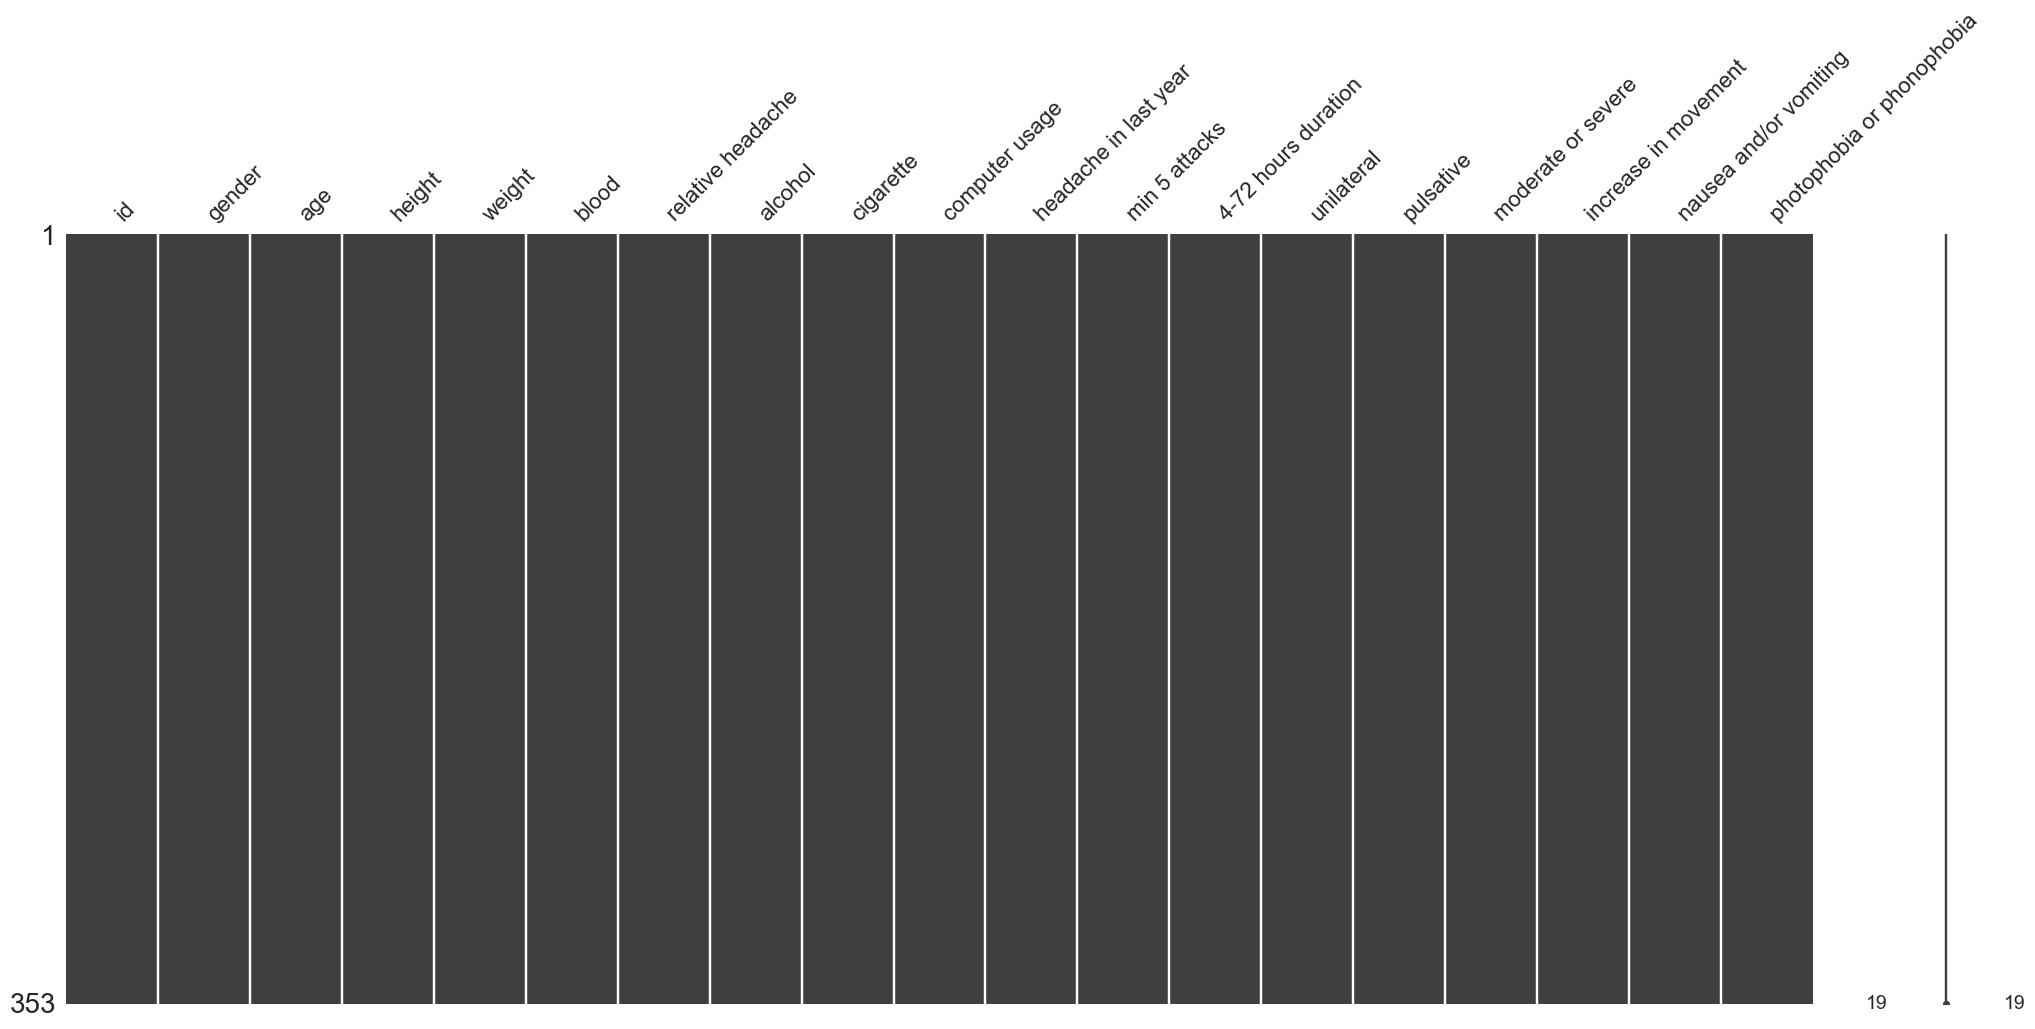

In [13]:
msno.matrix(df)

# DATA VISUALIZATION

In [14]:
# distribution of categorical variables
colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']


def cat_summary(data, col):
    print(pd.DataFrame({col:data[col].value_counts(),
                       "Ratio":100*data[col].value_counts()/len(data)}))

    px.histogram(data, x = col, color = col, width = 700, height = 400,
                    template = 'plotly_dark', color_discrete_sequence = colors).show()
for i in df[cat_cols]:
    cat_summary(df,i)

        gender  Ratio
gender               
male       213  60.34
female     140  39.66


        blood  Ratio
blood               
A Rh+     205  58.07
0 Rh+      76  21.53
B Rh+      32   9.07
AB Rh+     15   4.25
O Rh-      14   3.97
A Rh-       8   2.27
B Rh-       3   0.85


                   relative headache  Ratio
relative headache                          
yes                              211  59.77
no                               142  40.23


         alcohol  Ratio
alcohol                
no           235  66.57
yes          118  33.43


           cigarette  Ratio
cigarette                  
no               196  55.52
yes              157  44.48


                       headache in last year  Ratio
headache in last year                              
yes                                      288  81.59
no                                        65  18.41


               min 5 attacks  Ratio
min 5 attacks                      
no                       289  81.87
yes                       64  18.13


                     4-72 hours duration  Ratio
4-72 hours duration                            
no                                   285  80.74
yes                                   68  19.26


            unilateral  Ratio
unilateral                   
no                 223  63.17
yes                130  36.83


           pulsative  Ratio
pulsative                  
yes              187  52.97
no               166  47.03


                    moderate or severe  Ratio
moderate or severe                           
no                                 232  65.72
yes                                121  34.28


                      increase in movement  Ratio
increase in movement                             
yes                                    215  60.91
no                                     138  39.09


                        nausea and/or vomiting  Ratio
nausea and/or vomiting                               
no                                         306  86.69
yes                                         47  13.31


                            photophobia or phonophobia  Ratio
photophobia or phonophobia                                   
no                                                 197  55.81
yes                                                156  44.19


In [15]:
# install nbformat>=4.2.0 and ipywidgets>=7.5.1 for interactive plots with pip 
# nbformat>=4.2.0


In [16]:
#  distribution of numeric variables
import plotly.figure_factory as ff

num_cols=[col for col in df.columns if df[col].dtypes!="O" and col not in "id"]

def num_summary(data, col):

    fig = px.histogram(data, x=col,color="gender", marginal="rug",
                   hover_data=data.columns,template="plotly_dark",width=700, height=400)
    fig.show()
for i in df[num_cols]:
    num_summary(df,i)

Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 4000x2000 with 0 Axes>

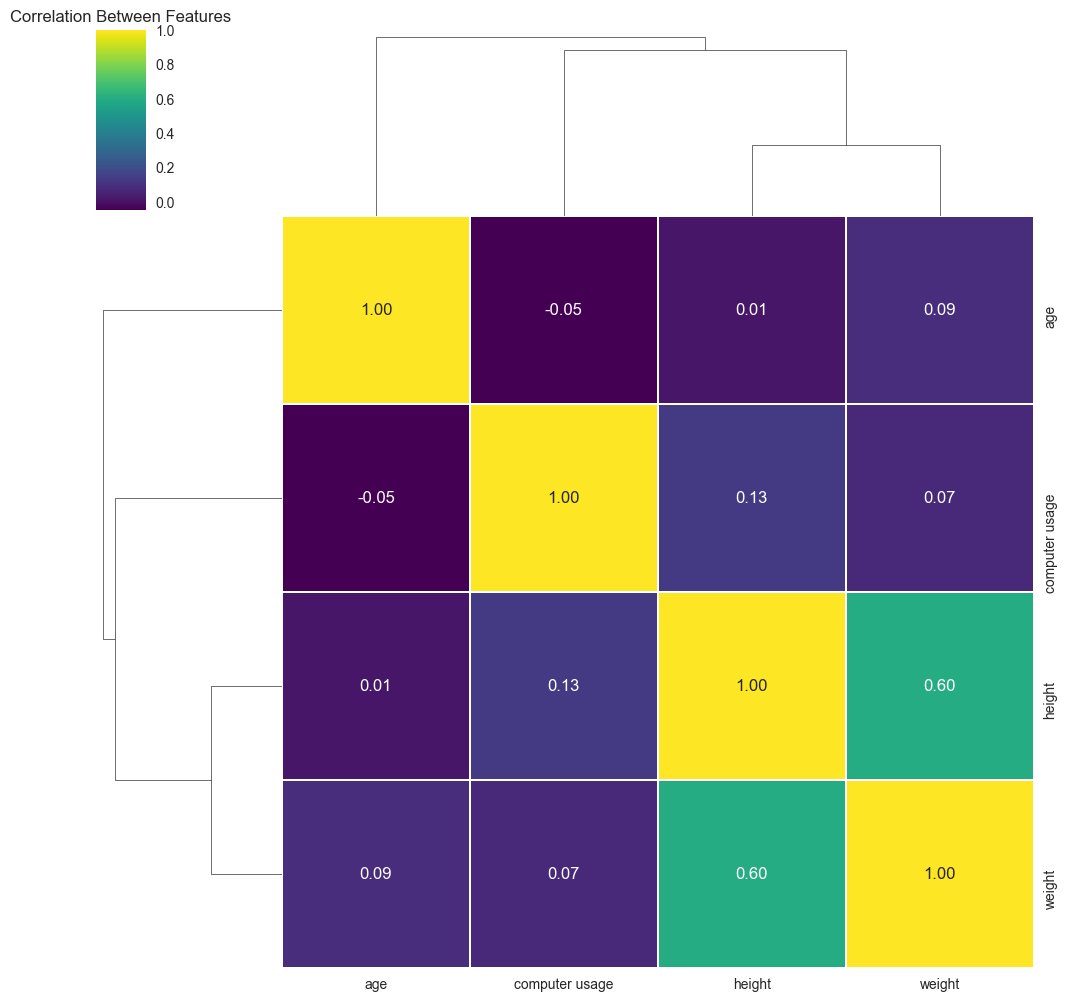

In [17]:
# correlation matrix 

# correlation matrix:
corr=df[num_cols].corr()
plt.figure(figsize=(40,20))
sns.clustermap(corr,cmap="viridis",linewidths=0.3,annot=True, fmt='.2f')
plt.title("Correlation Between Features")

<div class="alert alert-block alert-info">
<b>*</b> Burada sayısal değerler arasında ki korelasyonu gösterdik. Heatmap'ten anlaşıldığı üzere "Weight" ve "Height" değişkenleri arasdında yüksek pozitif korelasyon varken diğer değişkenlerde dikkate değer bir korelasyon yok
</div>

In [18]:
# correlation between relative headache and headache in the last year:

a=df.groupby("relative headache")["headache in last year"].value_counts()
b=100*df.groupby("relative headache")["headache in last year"].value_counts()/ df.groupby("relative headache")["headache in last year"].count()
pd.DataFrame({"count":a,"ratio":b})


count  ratio
relative headache headache in last year              
no                yes                      109  76.76
                  no                        33  23.24
yes               yes                      179  84.83
                  no                        32  15.17

In [19]:
# correlation between headache in last year and cigarette:

a=df.groupby("headache in last year")["cigarette"].value_counts()
b=100*df.groupby("headache in last year")["cigarette"].value_counts() /df.groupby("headache in last year")["cigarette"].count()
pd.DataFrame({"count":a,"ratio":b})

count  ratio
headache in last year cigarette              
no                    no            33  50.77
                      yes           32  49.23
yes                   no           163  56.60
                      yes          125  43.40

In [20]:
# correlation between headache in last year and alcohol:

a=df.groupby("headache in last year")["alcohol"].value_counts()
b=100*df.groupby("headache in last year")["alcohol"].value_counts()/df.groupby("headache in last year")["alcohol"].count()
pd.DataFrame({"count":a,"ratio":b})

count  ratio
headache in last year alcohol              
no                    no          42  64.62
                      yes         23  35.38
yes                   no         193  67.01
                      yes         95  32.99

In [21]:
# correlation between headache in last year and blood:

a=df.groupby("headache in last year")["blood"].value_counts()
b=100*df.groupby("headache in last year")["blood"].value_counts()/df.groupby("headache in last year")["blood"].count()
pd.DataFrame({"count":a,"ratio":b})

count  ratio
headache in last year blood               
no                    A Rh+      32  49.23
                      0 Rh+      17  26.15
                      AB Rh+      6   9.23
                      B Rh+       5   7.69
                      O Rh-       3   4.62
                      A Rh-       2   3.08
yes                   A Rh+     173  60.07
                      0 Rh+      59  20.49
                      B Rh+      27   9.38
                      O Rh-      11   3.82
                      AB Rh+      9   3.12
                      A Rh-       6   2.08
                      B Rh-       3   1.04

In [22]:
# correlation between phonofobia and blood:

a=df.groupby("photophobia or phonophobia")["blood"].value_counts()
b=100*df.groupby("photophobia or phonophobia")["blood"].value_counts()/len(df)
pd.DataFrame({"count":a,"ratio":b})

count  ratio
photophobia or phonophobia blood               
no                         A Rh+     115  32.58
                           0 Rh+      44  12.46
                           B Rh+      12   3.40
                           AB Rh+     10   2.83
                           O Rh-       9   2.55
                           A Rh-       4   1.13
                           B Rh-       3   0.85
yes                        A Rh+      90  25.50
                           0 Rh+      32   9.07
                           B Rh+      20   5.67
                           AB Rh+      5   1.42
                           O Rh-       5   1.42
                           A Rh-       4   1.13

<Figure size 2000x2000 with 0 Axes>

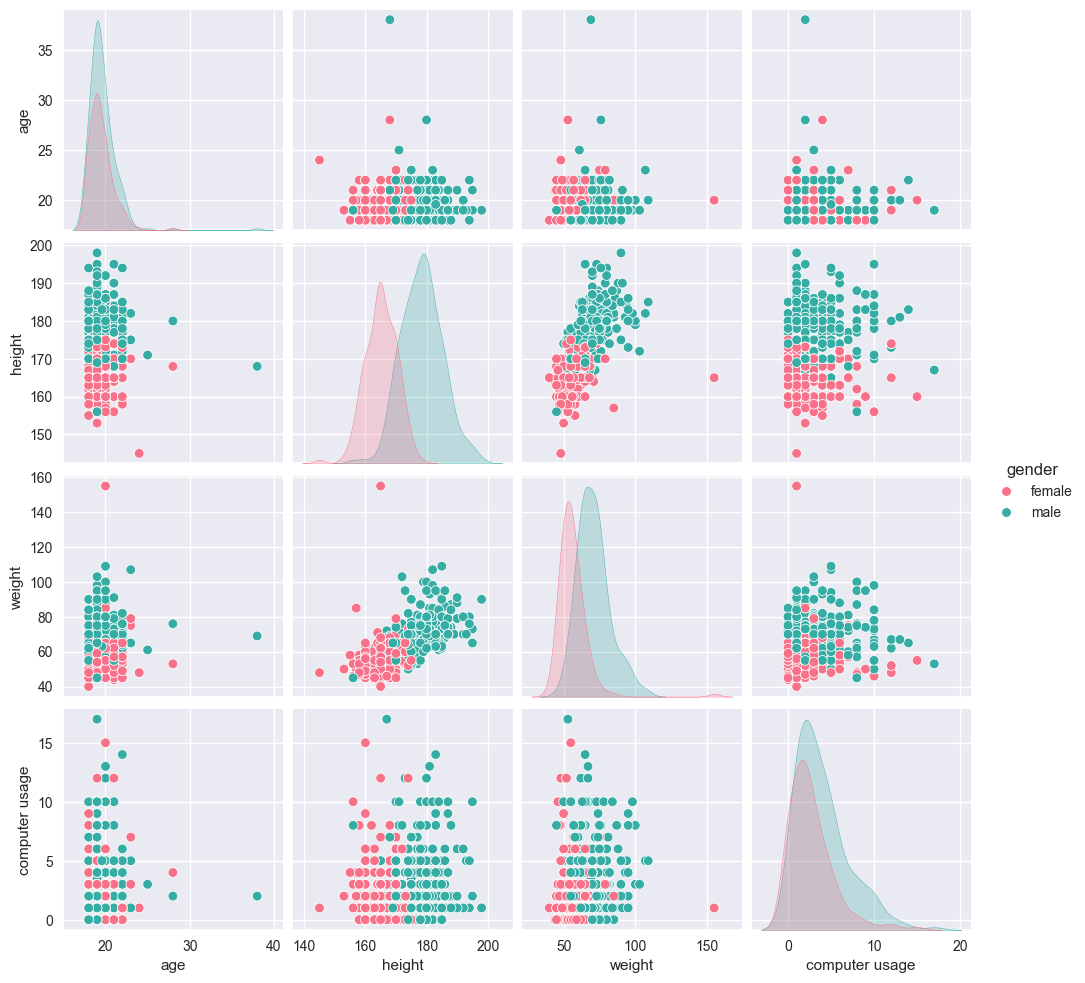

In [23]:
# pairplot of the selected features

plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
sns.pairplot(df.drop("id",axis=1),diag_kind="kde",palette="husl",hue="gender",kind="scatter");

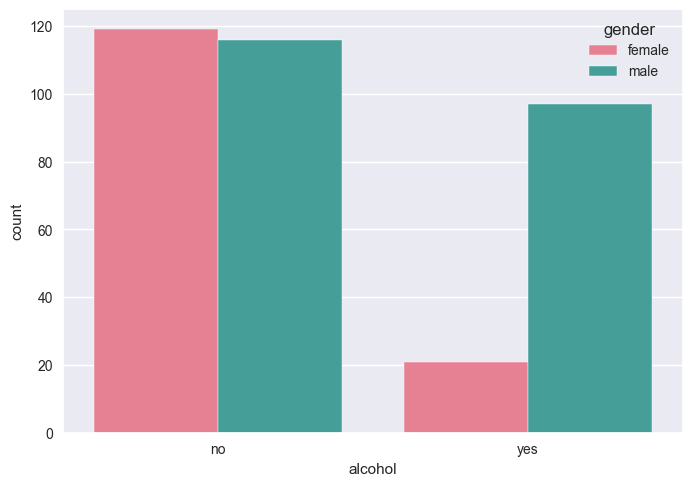

In [24]:
# distribution of gender and alcohol:

a=df.groupby(["gender"])["alcohol"].value_counts()
b=100 * df.groupby("gender")["alcohol"].value_counts() / len(df)
pd.DataFrame({"count":a,"ratio":b})

sns.countplot(df,x="alcohol",hue="gender",palette="husl")
plt.show()

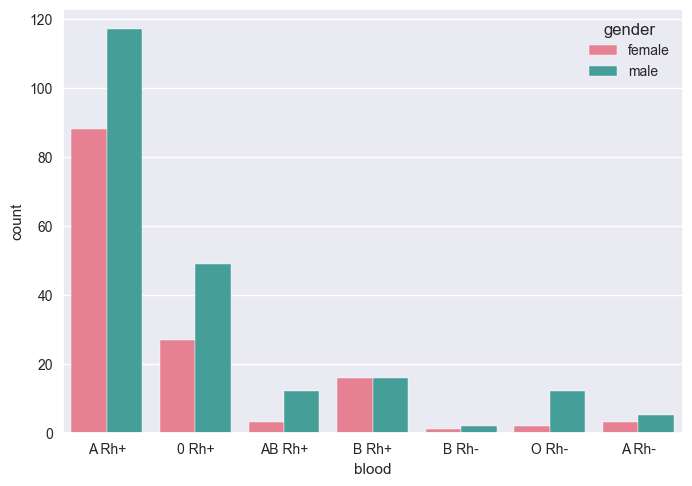

In [25]:
# relationship between age and alcohol:

sns.set_style("darkgrid")
sns.countplot(df,x="blood",hue="gender",palette="husl")
plt.show()

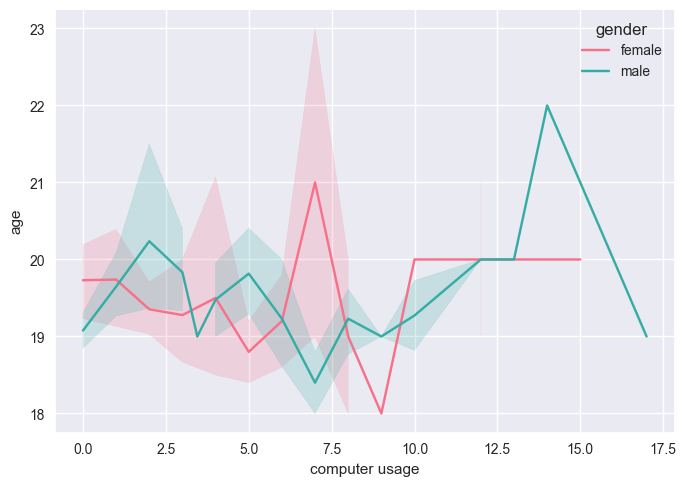

In [26]:
# relationship between age and computer usage based on gender:
sns.set_style("darkgrid")
sns.lineplot(df,x="computer usage",y="age",palette="husl",hue="gender")
plt.show()

# OUTLIER DETECTION

In [27]:
# showing outliers with boxplot in the dataset

for i in df[num_cols].columns:
    fig=px.box(df,y=i,color=df["gender"],title=i,width=900,height=500,template="plotly_dark")
    fig.show()

In [28]:
# Aykırı değer analizi:

num_cols=[col for col in df.columns if df[col].dtypes!="O" and col not in "id"]

# #  outlier threshold:
def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
    q1=dataframe[col_name].quantile(q1)
    q3=dataframe[col_name].quantile(q3)
    IQR=q3-q1
    
    up_limit=q3+1.5*IQR
    low_limit=q1-1.5*IQR
    
    return low_limit,up_limit

# # check outliers:
# # eğer değişkende aykırı değer varsa True döndürür, yoksa False döndürür.
def check_outliers(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]<low_limit) | (dataframe[col_name]>up_limit)].any(axis=None):
         return True 
   
    else:
         return False
    
def replace_with_thresholds(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    if low_limit > 0:
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
    else:
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit   
        
for col in num_cols:
     print(col, check_outliers(df, col))

for col in num_cols:
    replace_with_thresholds(df, col)
    print(col, check_outliers(df, col))

age True
height False
weight True
computer usage False
age False
height False
weight False
computer usage False


# DATA PREPROCESSING

In [29]:
# LABEL ENCODING:
df=df.drop("id",axis=1)
def label_encoder(df, column_name):
    if df[column_name].dtype == 'object':
        if df[column_name].nunique() <= 2:
            le = LabelEncoder()
            df[column_name] = le.fit_transform(df[column_name])
            return df
        elif df[column_name].nunique() > 2  and df[column_name].nunique() <= 10:
            ohe = OneHotEncoder()
            ohe_df = pd.DataFrame(ohe.fit_transform(df[[column_name]]).toarray())
            ohe_df.columns = [column_name + "_" + str(i) for i in ohe_df.columns]
            df = df.join(ohe_df)
            df = df.drop(column_name, axis=1)
            return df
        else:
            return df
        
    else:
        return df
    

for i in df.columns:
    df = label_encoder(df, i)
    
df.head()

,gender,age,height,weight,relative headache,alcohol,cigarette,computer usage,headache in last year,min 5 attacks,4-72 hours duration,unilateral,pulsative,moderate or severe,increase in movement,nausea and/or vomiting,photophobia or phonophobia,blood_0,blood_1,blood_2,blood_3,blood_4,blood_5,blood_6
0,0,18.00,165.00,53.00,1,0,0,4.00,1,0,1,1,1,0,1,1,1,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,0,18.00,171.00,60.00,1,1,1,3.00,1,0,0,1,1,0,1,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,19.00,173.13,73.00,1,0,0,1.00,1,0,0,0,1,0,1,0,1,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1,18.00,170.00,65.00,0,1,0,6.00,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,1,18.00,183.00,76.00,0,1,1,8.00,1,0,1,0,1,0,0,0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
# standardization ve normalization işlemleri:

mm=MinMaxScaler(feature_range=(0,1))
df=pd.DataFrame(mm.fit_transform(df),columns=df.columns)    

# CLUSTERING:

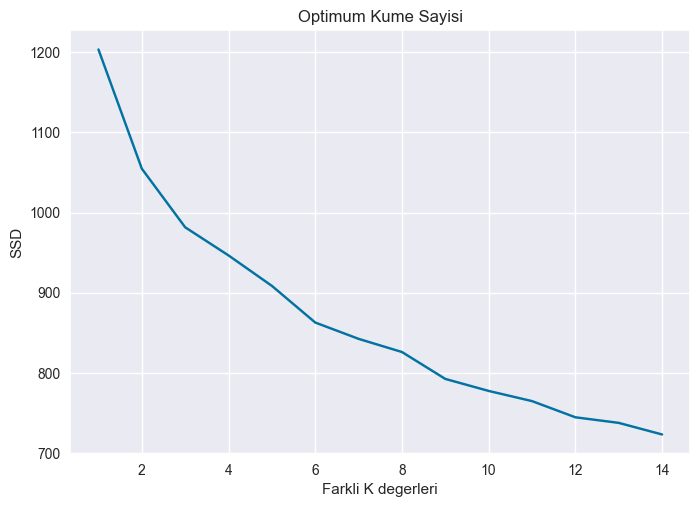

In [31]:
# finding the optimum number of clusters for k-means classification

ssd = []

k= range(1,15)

for i in k:
    model = KMeans(n_clusters=i)
    model.fit(df)
    ssd.append(model.inertia_)
    
plt.plot(k,ssd,"bx-")
plt.xlabel("Farkli K degerleri")
plt.ylabel("SSD")
plt.title("Optimum Kume Sayisi")
plt.show()

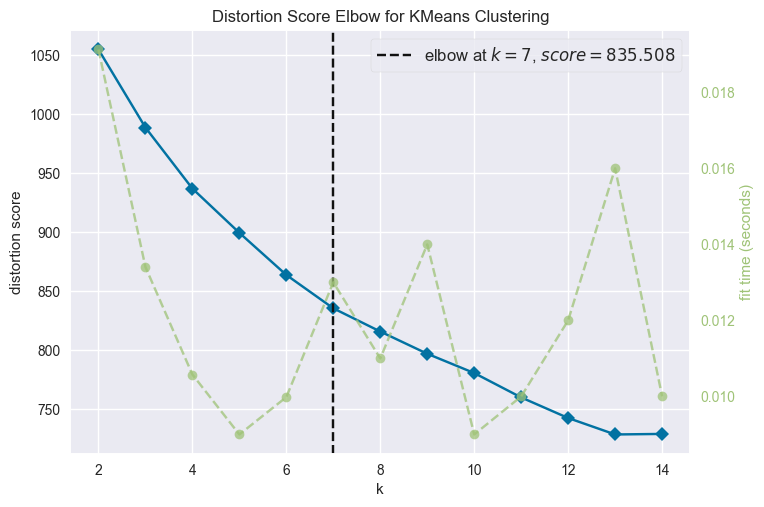

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
kmeans=KMeans()
elbow=KElbowVisualizer(kmeans,k=(2,15))
elbow.fit(df)
elbow.show()

In [33]:
# k=6 için modeli fit edelim
kmeans=KMeans(n_clusters=6)
kmeans.fit(df) 

#  oluşan clusterları dataframe e ekleyelim
clusters=kmeans.labels_

data1=pd.read_excel("dataset.xls")
df1=data1.copy()
df1.drop(["Unnamed: 21",	"Unnamed: 22",	"Unnamed: 23",	"Unnamed: 24",
         "Unnamed: 25",	"Unnamed: 26",	"Unnamed: 27",	"Unnamed: 28","Doctor Decision","prediction(headache)"],axis=1,inplace=True)
a=df1[df1["id"].isnull()].index
df1.drop(a,axis=0,inplace=True)
df1["weight"]= pd.to_numeric(df1["weight"],errors="coerce")
df1=fill_num_missing_values(df1)
num_cols=[col for col in df1.columns if df1[col].dtypes!="O" and col not in "id"]
for i in df1[num_cols]:
    replace_with_thresholds(df1, i)



df1["cluster"]=clusters

df1["cluster"]=df1["cluster"]+1

df1.head()


,id,gender,age,height,weight,blood,relative headache,alcohol,cigarette,computer usage,headache in last year,min 5 attacks,4-72 hours duration,unilateral,pulsative,moderate or severe,increase in movement,nausea and/or vomiting,photophobia or phonophobia,cluster
0,4.00,female,18.00,165.00,53.00,A Rh+,yes,no,no,4.00,yes,no,yes,yes,yes,no,yes,yes,yes,4
1,5.00,female,18.00,171.00,60.00,0 Rh+,yes,yes,yes,3.00,yes,no,no,yes,yes,no,yes,no,yes,1
2,6.00,male,19.00,173.13,73.00,0 Rh+,yes,no,no,1.00,yes,no,no,no,yes,no,yes,no,yes,1
3,7.00,male,18.00,170.00,65.00,AB Rh+,no,yes,no,6.00,no,no,no,no,no,yes,no,no,no,5
4,8.00,male,18.00,183.00,76.00,0 Rh+,no,yes,yes,8.00,yes,no,yes,no,yes,no,no,no,no,2


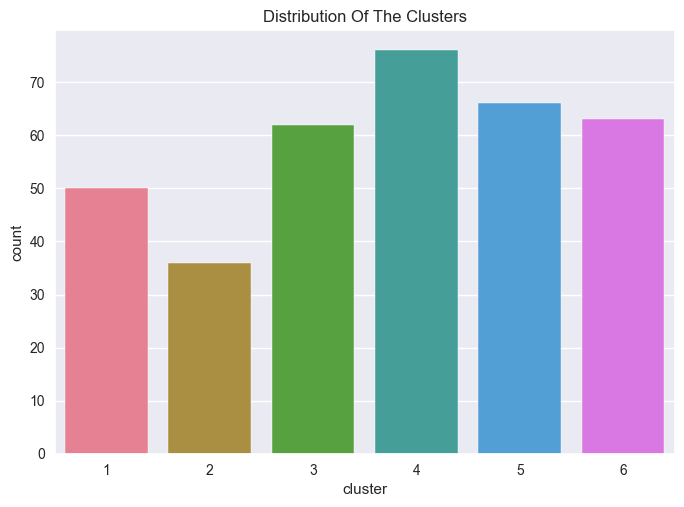

,count,ratio %
cluster,,
1,50,14.16
2,36,10.20
3,62,17.56
4,76,21.53
5,66,18.70
6,63,17.85


In [34]:
# clusterların sayılarını ve dağılım oranlarını görelim
pl = sns.countplot(x=df1["cluster"], palette= "husl")
pl.set_title("Distribution Of The Clusters")
plt.show()

cl=df1.groupby("cluster")["id"].count()
cl_ratio=100*df1.groupby("cluster")["id"].count()/len(df1)
a=pd.DataFrame({"count":cl,"ratio %":cl_ratio})
a



In [36]:
# her cluster için ayrı dataframe oluşturma:
unique_clusters = df1['cluster'].unique()           
                                                                   
for cluster in unique_clusters:                             
    cluster_data = df1[df1['cluster'] == cluster]
    globals()[f'segment_{cluster}'] = cluster_data

# Clusterları inceleme:

        gender  Ratio
gender               
female      25  50.00
male        25  50.00
##########################################
        blood  Ratio
blood               
0 Rh+      41  82.00
AB Rh+      5  10.00
B Rh+       3   6.00
O Rh-       1   2.00
##########################################
                   relative headache  Ratio
relative headache                          
yes                               32  64.00
no                                18  36.00
##########################################
         alcohol  Ratio
alcohol                
no            42  84.00
yes            8  16.00
##########################################
           cigarette  Ratio
cigarette                  
no                37  74.00
yes               13  26.00
##########################################
                       headache in last year  Ratio
headache in last year                              
yes                                       44  88.00
no                             

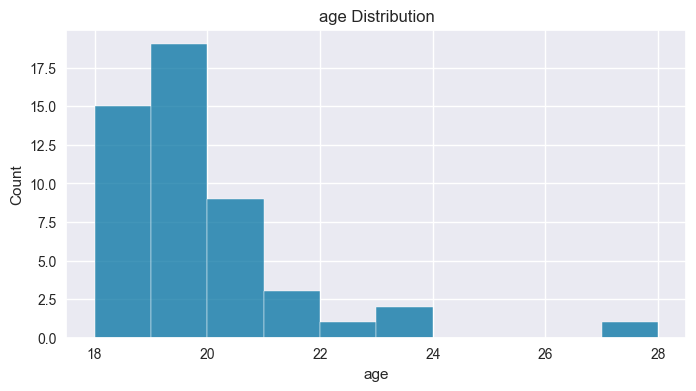

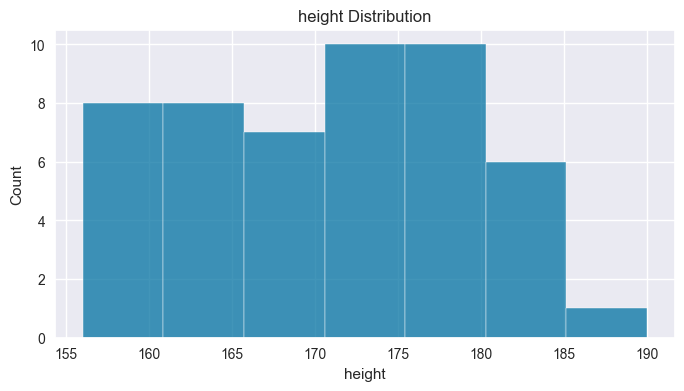

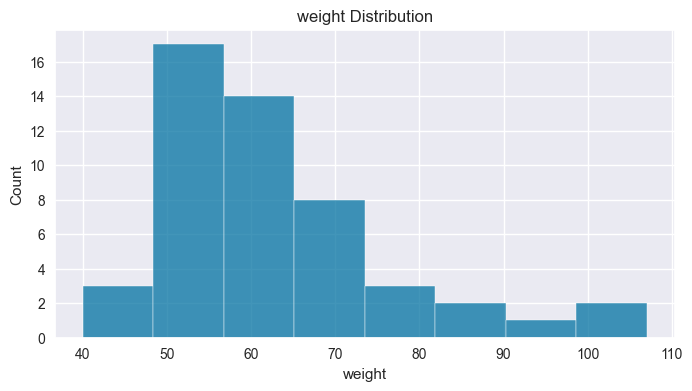

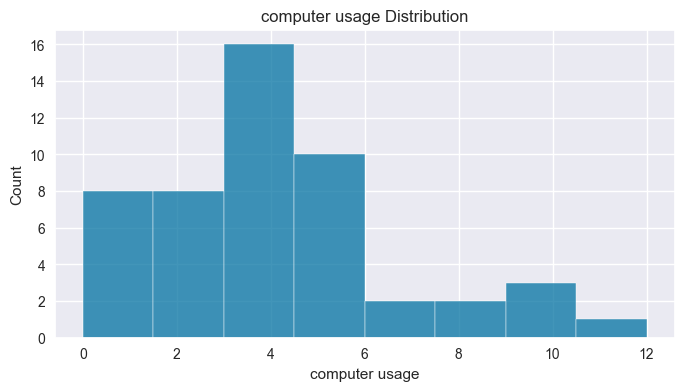

In [37]:
# 1. cluster 
cat_cols=[col for col in segment_1.columns if segment_1[col].dtypes=="O" and col not in ["id"]]
num_cols=[col for col in segment_1.columns if segment_1[col].dtypes!="O" and col not in ["id","cluster"]]

for col  in segment_1[cat_cols].columns:
    print(pd.DataFrame({col:segment_1[col].value_counts(),
                       "Ratio":100*segment_1[col].value_counts()/len(segment_1)}))
    print("##########################################")
    
def num_summary(dataframe, col):
    plt.figure(figsize=(8,4))
    sns.histplot(dataframe,x=col,palette="set1")
    plt.title(col+" "+"Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

for i in segment_1[num_cols]:
    num_summary(segment_1,i)

        gender  Ratio
gender               
male        33  91.67
female       3   8.33
##########################################
        blood  Ratio
blood               
0 Rh+      33  91.67
O Rh-       1   2.78
B Rh+       1   2.78
AB Rh+      1   2.78
##########################################
                   relative headache  Ratio
relative headache                          
no                                19  52.78
yes                               17  47.22
##########################################
         alcohol  Ratio
alcohol                
no            21  58.33
yes           15  41.67
##########################################
           cigarette  Ratio
cigarette                  
yes               28  77.78
no                 8  22.22
##########################################
                       headache in last year  Ratio
headache in last year                              
yes                                       22  61.11
no                             

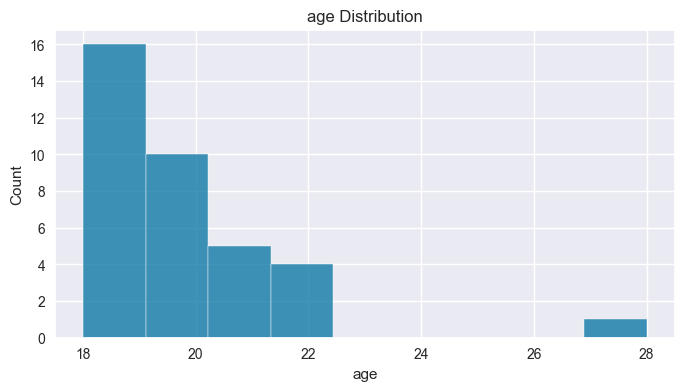

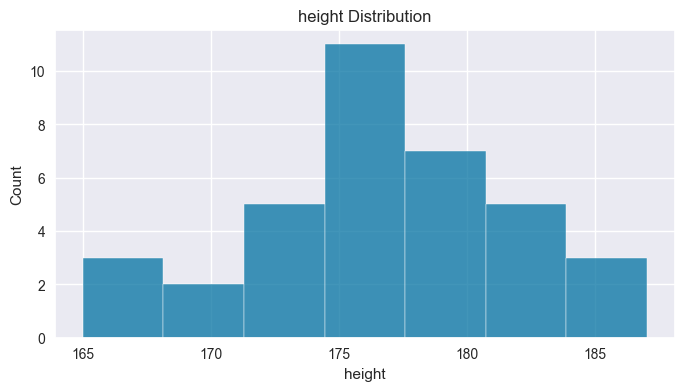

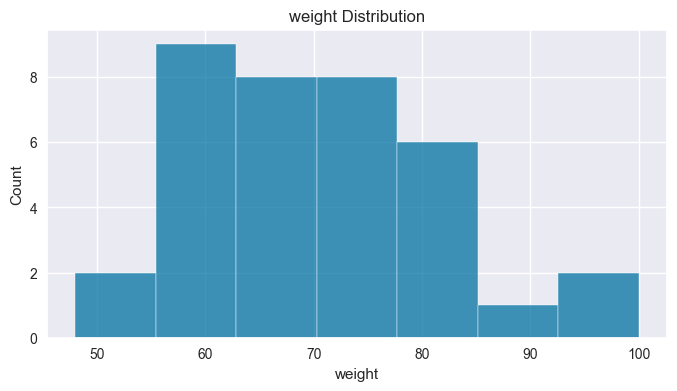

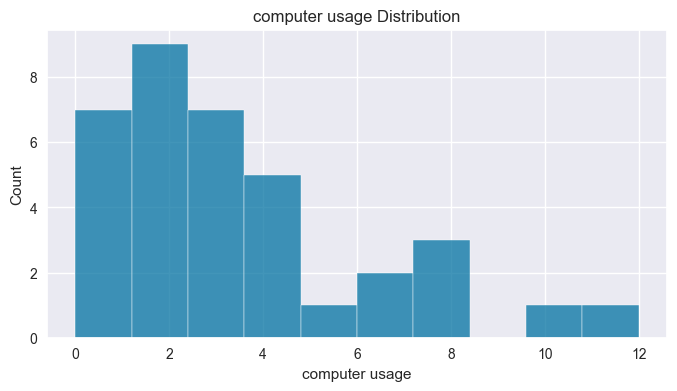

In [38]:
# 2. cluster
cat_cols=[col for col in segment_2.columns if segment_2[col].dtypes=="O" and col not in ["id"]]
num_cols=[col for col in segment_2.columns if segment_2[col].dtypes!="O" and col not in ["id","cluster"]]

for col  in segment_2[cat_cols].columns:
    print(pd.DataFrame({col:segment_2[col].value_counts(),
                       "Ratio":100*segment_2[col].value_counts()/len(segment_2)}))
    print("##########################################")
for i in segment_2[num_cols]:
    num_summary(segment_2,i)

        gender  Ratio
gender               
female      33  53.23
male        29  46.77
##########################################
       blood  Ratio
blood              
A Rh+     18  29.03
B Rh+      4   6.45
A Rh-      2   3.23
0 Rh+      1   1.61
B Rh-      1   1.61
O Rh-      1   1.61
##########################################
                   relative headache  Ratio
relative headache                          
yes                               57  91.94
no                                 5   8.06
##########################################
         alcohol  Ratio
alcohol                
no            53  85.48
yes            9  14.52
##########################################
           cigarette  Ratio
cigarette                  
no                50  80.65
yes               12  19.35
##########################################
                       headache in last year  Ratio
headache in last year                              
yes                                       43  69.

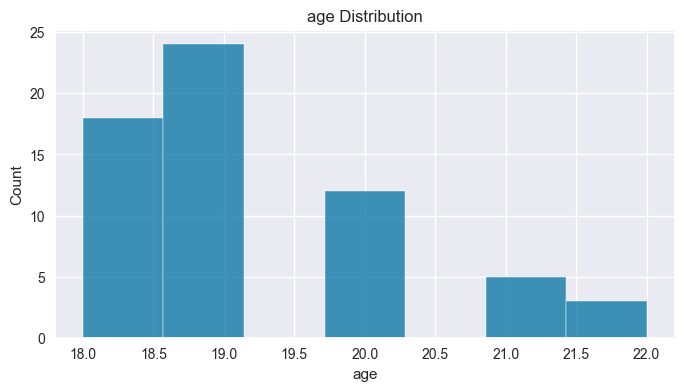

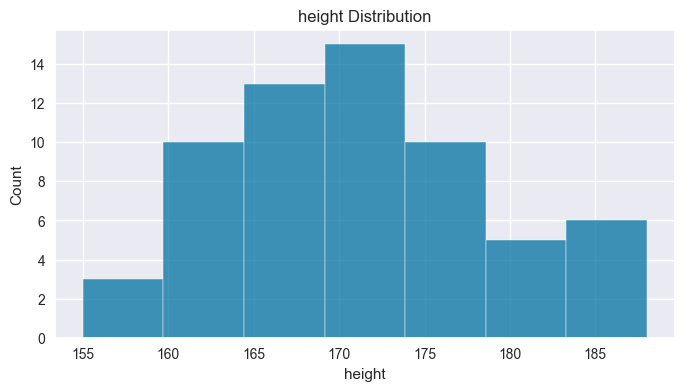

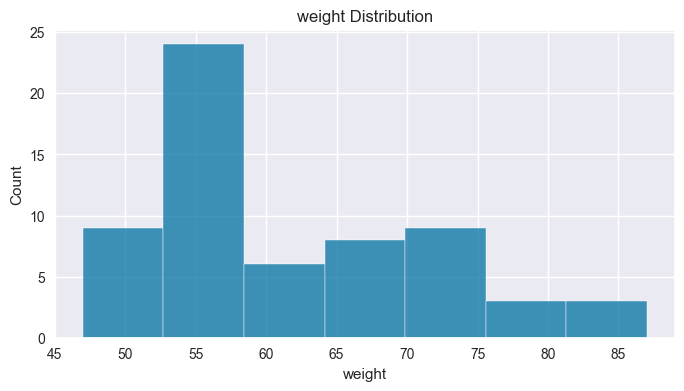

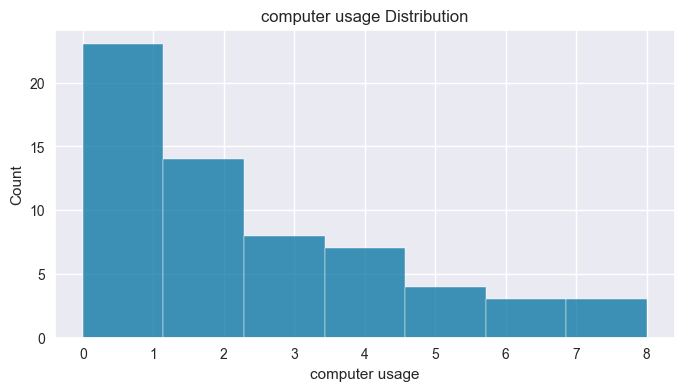

In [39]:
# 3. cluster
cat_cols=[col for col in segment_3.columns if segment_3[col].dtypes=="O" and col not in ["id"]]
num_cols=[col for col in segment_3.columns if segment_3[col].dtypes!="O" and col not in ["id","cluster"]]

for col  in segment_3[cat_cols].columns:
    print(pd.DataFrame({col:segment_3[col].value_counts(),
                       "Ratio":100*segment_3[col].value_counts()/len(segment_3)}))
    print("##########################################")
for i in segment_3[num_cols]:
    num_summary(segment_3,i)

        gender  Ratio
gender               
female      73  96.05
male         3   3.95
##########################################
        blood  Ratio
blood               
A Rh+      32  42.11
B Rh+      13  17.11
B Rh-       1   1.32
AB Rh+      1   1.32
O Rh-       1   1.32
##########################################
                   relative headache  Ratio
relative headache                          
yes                               53  69.74
no                                23  30.26
##########################################
         alcohol  Ratio
alcohol                
no            71  93.42
yes            5   6.58
##########################################
           cigarette  Ratio
cigarette                  
no                50  65.79
yes               26  34.21
##########################################
                       headache in last year  Ratio
headache in last year                              
yes                                       75  98.68
no        

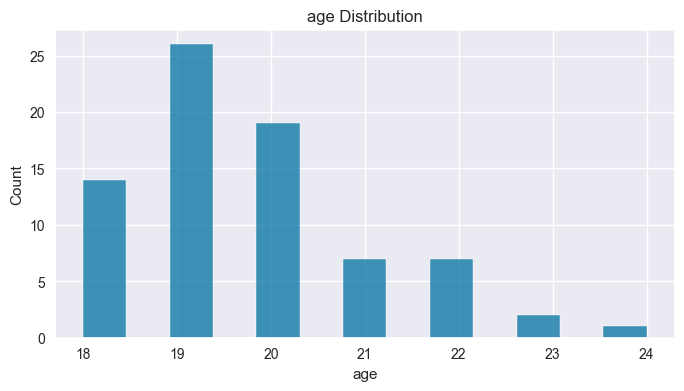

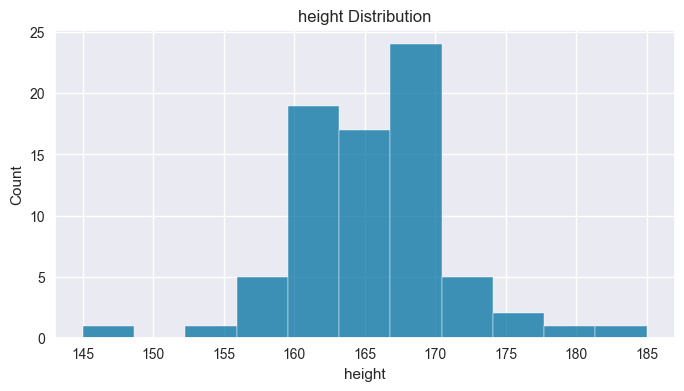

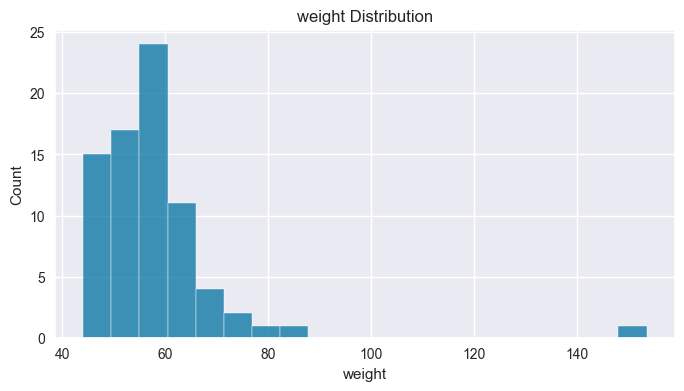

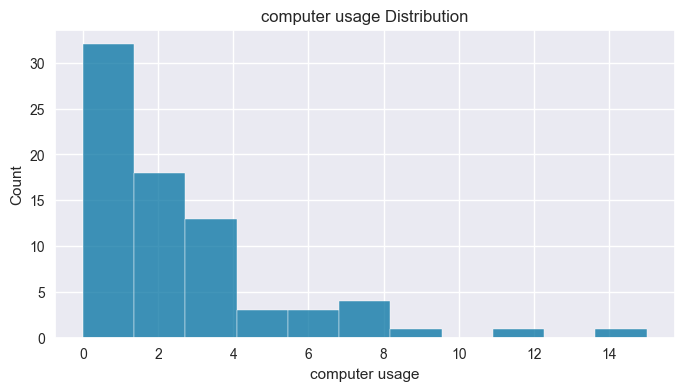

In [40]:
# 4. cluster
cat_cols=[col for col in segment_4.columns if segment_4[col].dtypes=="O" and col not in ["id"]]
num_cols=[col for col in segment_4.columns if segment_4[col].dtypes!="O" and col not in ["id","cluster"]]
for col  in segment_4[cat_cols].columns:
    print(pd.DataFrame({col:segment_4[col].value_counts(),
                       "Ratio":100*segment_4[col].value_counts()/len(segment_4)}))
    print("##########################################")
for i in segment_4[num_cols]:
    num_summary(segment_4,i)

        gender  Ratio
gender               
male        61  92.42
female       4   6.06
 male        1   1.52
##########################################
        blood  Ratio
blood               
A Rh+      27  40.91
AB Rh+      7  10.61
O Rh-       6   9.09
B Rh+       5   7.58
A Rh-       3   4.55
B Rh-       1   1.52
##########################################
                   relative headache  Ratio
relative headache                          
no                                60  90.91
yes                                6   9.09
##########################################
         alcohol  Ratio
alcohol                
yes           40  60.61
no            26  39.39
##########################################
           cigarette  Ratio
cigarette                  
no                37  56.06
yes               29  43.94
##########################################
                       headache in last year  Ratio
headache in last year                              
yes                

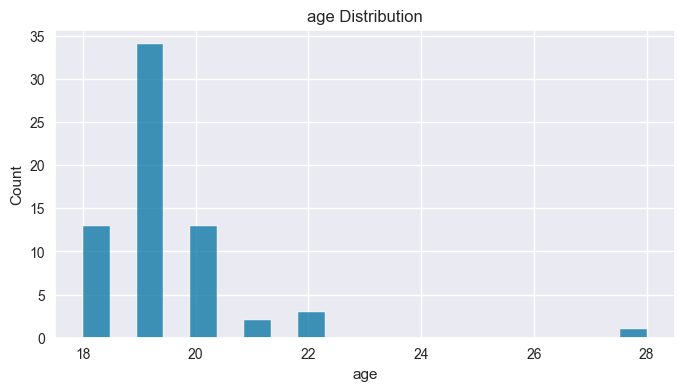

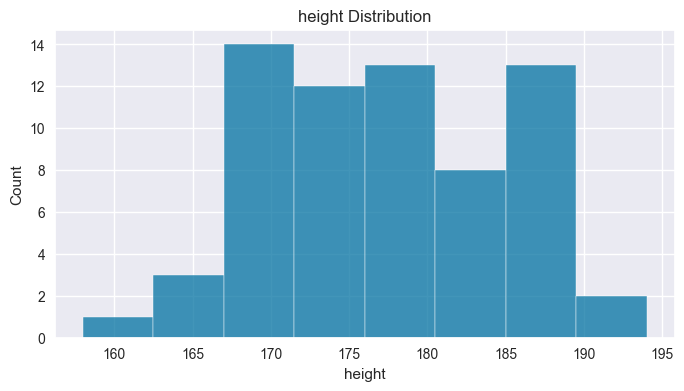

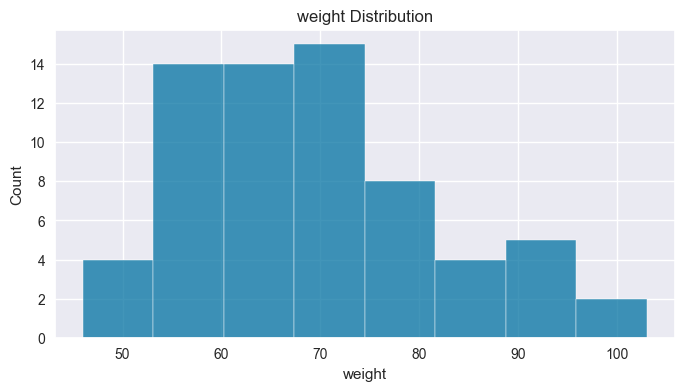

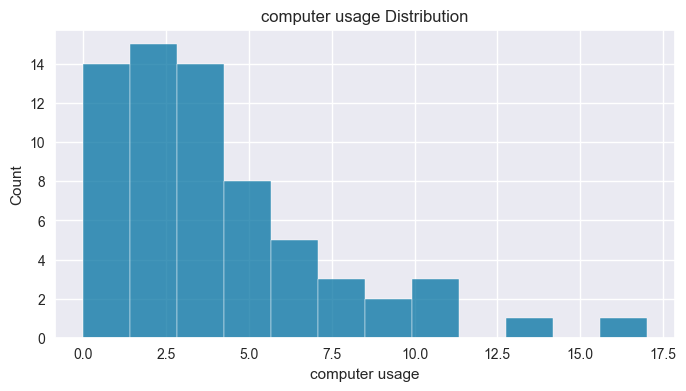

In [41]:
# 5. cluster
cat_cols=[col for col in segment_5.columns if segment_5[col].dtypes=="O" and col not in ["id"]]
num_cols=[col for col in segment_5.columns if segment_5[col].dtypes!="O" and col not in ["id","cluster"]]

for col  in segment_5[cat_cols].columns:
    print(pd.DataFrame({col:segment_5[col].value_counts(),
                       "Ratio":100*segment_5[col].value_counts()/len(segment_5)}))
    print("##########################################")
for i in segment_5[num_cols]:
    num_summary(segment_5,i)

        gender  Ratio
gender               
male        61  96.83
female       2   3.17
##########################################
        blood  Ratio
blood               
A Rh+      30  47.62
B Rh+       6   9.52
O Rh-       4   6.35
A Rh-       3   4.76
0 Rh+       1   1.59
AB Rh+      1   1.59
##########################################
                   relative headache  Ratio
relative headache                          
yes                               46  73.02
no                                17  26.98
##########################################
         alcohol  Ratio
alcohol                
yes           41  65.08
no            22  34.92
##########################################
           cigarette  Ratio
cigarette                  
yes               49  77.78
no                14  22.22
##########################################
                       headache in last year  Ratio
headache in last year                              
yes                                      

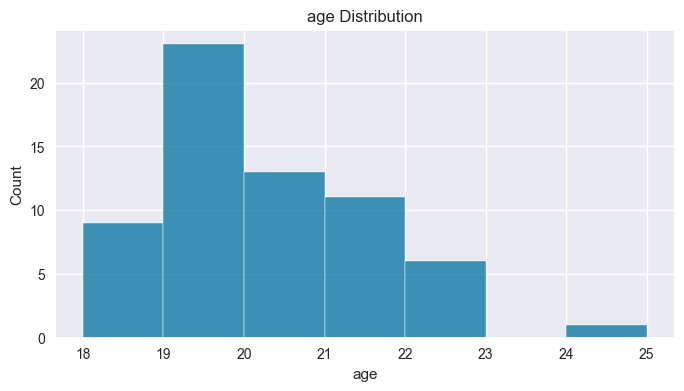

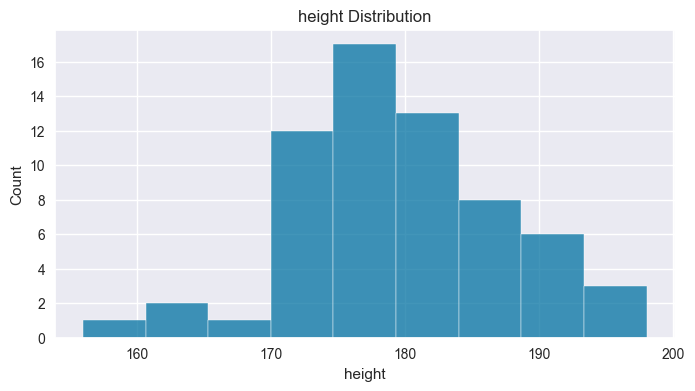

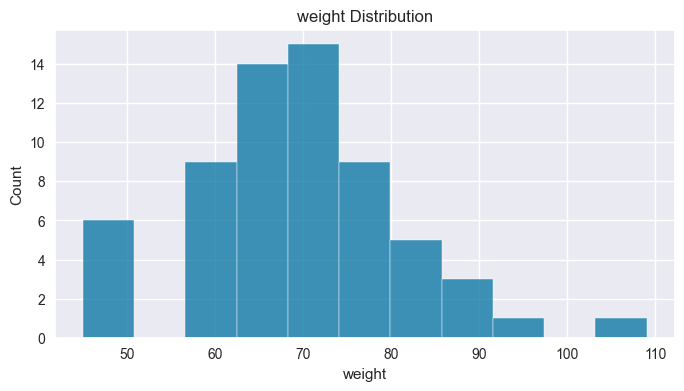

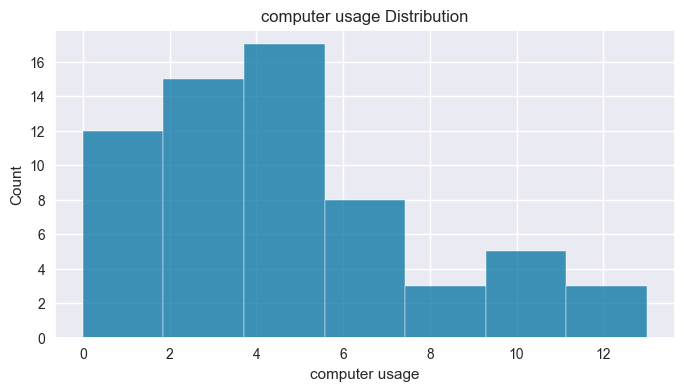

In [42]:
# 6. cluster

cat_cols=[col for col in segment_6.columns if segment_6[col].dtypes=="O" and col not in ["id"]]
num_cols=[col for col in segment_6.columns if segment_6[col].dtypes!="O" and col not in ["id","cluster"]]
for col  in segment_6[cat_cols].columns:
    print(pd.DataFrame({col:segment_6[col].value_counts(),
                       "Ratio":100*segment_6[col].value_counts()/len(segment_6)}))
    print("##########################################")
for i in segment_6[num_cols]:
    num_summary(segment_6,i)

In [43]:
!pip3 install config

Defaulting to user installation because normal site-packages is not writeable
